<a id="top"></a>
#  Unsupervised Learning Predict Notebook
##### Members: VUYISILE

 # Table of contents
1. [Introduction](#intro)
2. [Data collection and Cleaning](#data)
3. [Exploratory Data Analysis](#EDA)
 

<a id="intro"></a>
# 1. Introduction

The birth of the Motion Picture Camera in the late 18th century gave birth to possibly the most potent form of entertainment in existence: Cinema. Movies have managed to enthrall audiences ever since one second clips of racing horses emerged in the 1890s to the introduction of sound in the 1920s to the birth of color in the 1930s to mainstream 3D Movies in the early 2010s.

Cinema had humble origins in terms of plot, direction and acting (mainly due to its extremely short duration in its early days) but since then, movie industries around the world have been blessed with creative geniuses in the form of directors, screenwriters, actors, sound designers and cinematographers. It has also spread itself into a plethora of genres ranging from romance to comedy to science fiction to horror.

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.



### Source
The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB


### Supplied Files
* genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* sample_submission.csv - Sample of the submission format for the hackathon.
* tags.csv - User assigned for the movies within the dataset.
* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/edsa-movie-recommendation-challenge/sample_submission.csv
/kaggle/input/edsa-movie-recommendation-challenge/movies.csv
/kaggle/input/edsa-movie-recommendation-challenge/imdb_data.csv
/kaggle/input/edsa-movie-recommendation-challenge/genome_tags.csv
/kaggle/input/edsa-movie-recommendation-challenge/genome_scores.csv
/kaggle/input/edsa-movie-recommendation-challenge/train.csv
/kaggle/input/edsa-movie-recommendation-challenge/test.csv
/kaggle/input/edsa-movie-recommendation-challenge/tags.csv
/kaggle/input/edsa-movie-recommendation-challenge/links.csv


<a id="data"></a>
# 2. Data collection and Cleaning

Below are all libraries that are used through out this notebook.

In [6]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import StandardScaler
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud 

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne, KNNBaseline, KNNWithZScore, BaselineOnly
from surprise import CoClustering, NormalPredictor
from surprise import accuracy
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import StandardScaler
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.metrics.pairwise import linear_kernel
#init_notebook_mode(connected=True)
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")
pd.set_option('display.max_columns', 37)
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display_html 
from IPython.core.display import HTML
from collections import defaultdict
import datetime
import re
#import squarify
import os

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

## Reading in data

In [8]:
#df_sample_submission = pd.read_csv('sample_submission.csv')
df_movies = pd.read_csv('movies.csv')
df_imdb = pd.read_csv('imdb_data.csv')
#df_genome_scores = pd.read_csv('genome_scores.csv')
#df_genome_tags = pd.read_csv('genome_tags.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
#df_tags = pd.read_csv('tags.csv')
#df_links = pd.read_csv('links.csv')


In [9]:
# storing this mergered data for later use
all_movies = pd.merge(df_movies, df_imdb, how = 'left', on = 'movieId')

In [10]:
#Show "imdb_df" dataframe
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


## Data Normalisation and Combination

In [19]:
df_movies['release_year']=df_movies['title'].str[-5:-1] #extracting released year
df_movies['genres']=df_movies['genres'].str.split('|') #spliting the genres into a list
df_movies=pd.concat([df_movies,df_train['rating']],axis=1).dropna() #concatinate ratings with movies dataframe
df_movies.head()

,movieId,title,genres,release_year,rating
0,1.0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,4.0
1,2.0,Jumanji (1995),"[Adventure, Children, Fantasy]",1995,4.5
2,3.0,Grumpier Old Men (1995),"[Comedy, Romance]",1995,5.0
3,4.0,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995,2.0
4,5.0,Father of the Bride Part II (1995),[Comedy],1995,3.0


In [20]:
# Spliting the title cast into a list
df_imdb['title_cast']=df_imdb['title_cast'].str.split('|') 

# Spliting the Key words into a list
df_imdb['plot_keywords']=df_imdb['plot_keywords'].str.split('|') 

# Viewing the data
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]"
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]"
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]"
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,124.0,"$16,000,000","[black american, husband wife relationship, be..."
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]"


In [18]:
df_movies.shape

(62423, 5)

This shows that the df_movies dataframe has 62423 features(movies) and five columns

In [19]:
df_movies.head()

,movieId,title,genres,release_year,rating
0,1.0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,4.0
1,2.0,Jumanji (1995),"[Adventure, Children, Fantasy]",1995,4.5
2,3.0,Grumpier Old Men (1995),"[Comedy, Romance]",1995,5.0
3,4.0,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995,2.0
4,5.0,Father of the Bride Part II (1995),[Comedy],1995,3.0


In [20]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62423 entries, 0 to 62422
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movieId       62423 non-null  float64
 1   title         62423 non-null  object 
 2   genres        62423 non-null  object 
 3   release_year  62423 non-null  object 
 4   rating        62423 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.9+ MB


The df-movies dataframe columns are of type float64 for movieId and ratings. The columns title, genres and the release_year are  of type objects.

In [22]:
df_imdb.shape

(27278, 6)

The df_imdb has 27278 rows and 6 columns 

In [23]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


### Counting the ratings of each movie

In [21]:
# Average ratings of each movie
df2 = pd.DataFrame(df_movies.groupby('title')['rating'].mean()).reset_index()

In [22]:
# viewing the first five rows of the dataframe df2
df2.head()

,title,rating
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",5.0
1,"""Great Performances"" Cats (1998)",5.0
2,#1 Cheerleader Camp (2010),4.0
3,#Captured (2017),2.5
4,#Female Pleasure (2018),4.0


<a id="EDA"></a>
## 3. Exploratory Data Analysis
The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events and find interesting relations among the variables.

In [23]:
def extract_popular_movies(df1,df2):

    """
    A function that retruns popular movies based on 
    the avarage ratings and the total ratings count.

    Parameters:

    df1: DataFrame from the train_df
    df2: DataFrame from the movies_df

    Returns a dataframe of porpular movies.

    """
    
    # Calculating avarage rating and storing the results as a DataFrame
    rating = pd.DataFrame(df1.groupby('movieId')['rating'].mean())
    
    # Calculating total ratings count and storing the results as a DataFrame
    rating['ratings_count'] = pd.DataFrame(df1.groupby('movieId')['rating'].count())
    rating=rating.sort_values(by=['ratings_count','ratings_count'],ascending=False).reset_index()

    # Joining both DataFrames
    inner_join = pd.merge(rating,df2,on ='movieId',how ='inner')
    popular_movies=inner_join[['title','rating_x','ratings_count','release_year']].rename(columns={"rating_x": "rating"})

    return popular_movies

In [24]:
# display the extracted porpular movies
extract_popular_movies(df_train,df_movies).head() 

,title,rating,ratings_count,release_year
0,"Shawshank Redemption, The (1994)",4.417624,32831,1994
1,Forrest Gump (1994),4.047216,32383,1994
2,Pulp Fiction (1994),4.195097,31697,1994
3,"Silence of the Lambs, The (1991)",4.144172,29444,1991
4,"Matrix, The (1999)",4.154253,29014,1999


* title : Title of movies.
* rating : Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).
* ratings_count: Total number of ratings per movies.
* release_year: Year which the movie has been released.

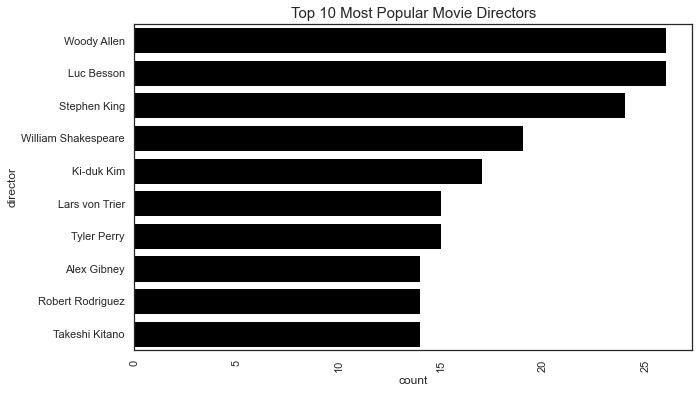

In [26]:
# Plotting top 10 movie directors using a count-plot
plt.figure(figsize = (10,6))
director=df_imdb['director']#.explode()
axes=sns.countplot(y=director, order = director.value_counts().index[1:11],color='black')
axes.set_title('Top 10 Most Popular Movie Directors',fontsize=15)
plt.xticks(rotation=90)
plt.show()

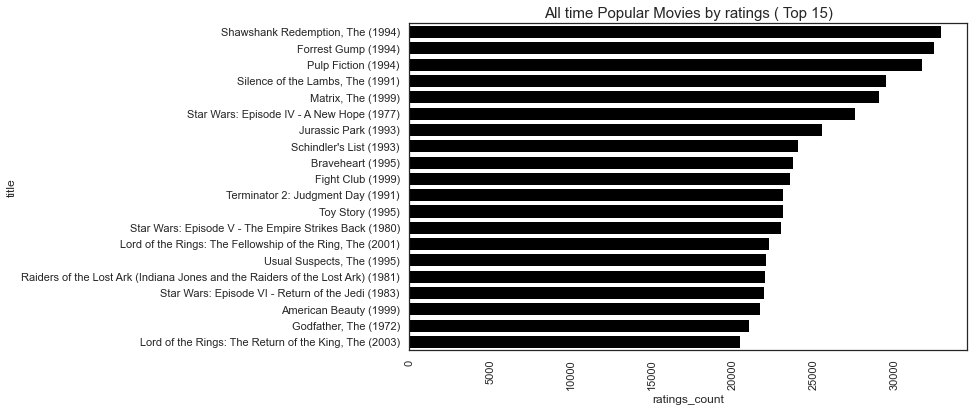

In [27]:
df=extract_popular_movies(df_train,df_movies)

# Bar plot of most popular movies by ratings
plt.figure(figsize = (10,6))
ax=sns.barplot(y='title', x='ratings_count', data=df.head(10),color='black')
ax.set_title('All time Popular Movies by ratings ( Top 10)',fontsize=15)
plt.xticks(rotation=90)
plt.show()

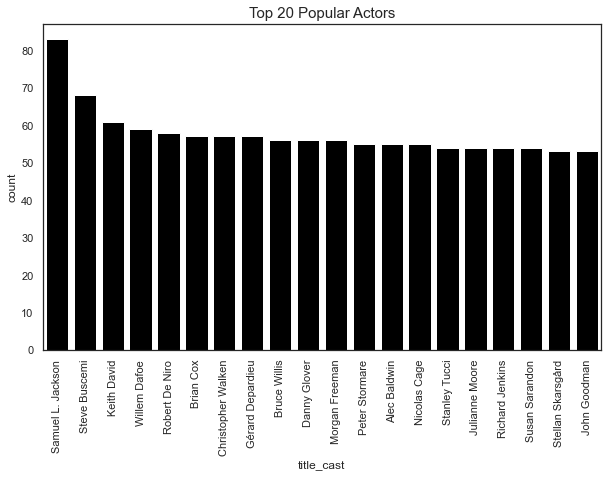

In [28]:
# Plotting popular cast using a count-plot
plt.figure(figsize = (10,6))
title_cast=df_imdb['title_cast'].explode()
ax=sns.countplot(x=title_cast, order = title_cast.value_counts().index[:20],color='black')
ax.set_title('Top 20 Popular Actors',fontsize=15)
plt.xticks(rotation=90)
plt.show()

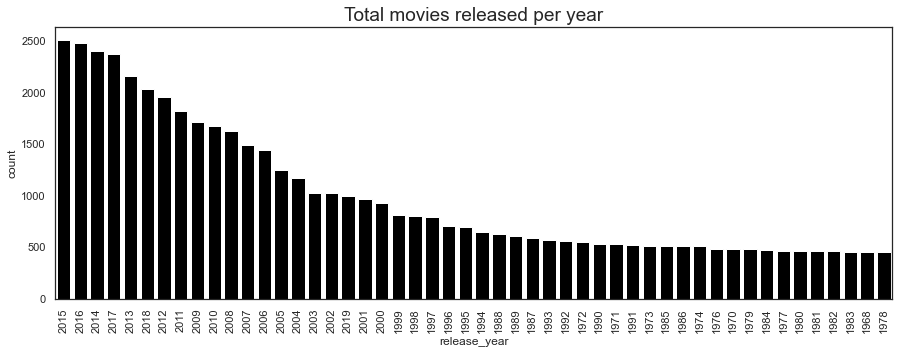

In [29]:
# Plotting total amount of movies released in each year using a count plot.
figure= plt.subplots(figsize=(15, 5))
axes=sns.countplot(x=df_movies['release_year'], order = df_movies['release_year'].value_counts()[0:50].index,color='black')
axes.set_title('Total movies released per year',fontsize=19)
plt.xticks(rotation=90)
plt.show()

It appears that 2015, 2016, 2014, 2017 and 2013 are the most popular years when it comes to movie releases in that order. In Hollywood circles, this is also known as the the dump years when sub par movies are released by the dozen.

Global film production is booming, thanks in large part to new technologies.  It’s cheaper and easier than ever before to shoot, edit and distribute a feature film, not to mention the effect of the internet in sharing ideas, knowledge and advice.
It’s not possible to give a definitive figure for the exact number of films made each year but the growth can be seen from the graph above.

### Title Wordcloud

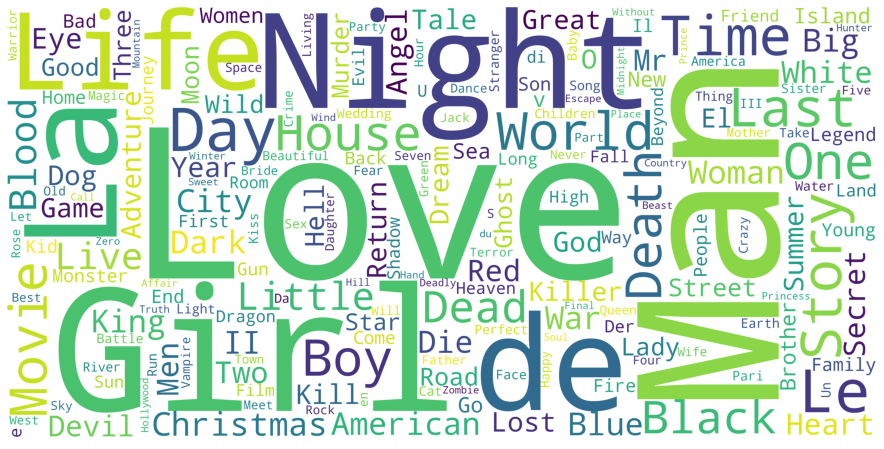

In [30]:
# Creating a wordcloud of the movie titles to view the most popular movie titles withtin the word cloud
df_movies['title'] = df_movies['title'].fillna("").astype('str')
title_corpus = ' '.join(df_movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)

# Plotting the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

The word Love is the most commonly used word in movie titles. Girl, Boy, Woman and Man are also among the most commonly occuring words. I think this encapsulates the idea of the  presence of romance in movies pretty well.

In [37]:
# Merging the imdb_df and movies_df
movies_imdb= pd.merge(df_imdb,df_movies,on ='movieId',how ='inner')

In [38]:
movies_imdb.isnull().sum()

movieId              0
title_cast        9665
director          9519
runtime          11345
budget           17583
plot_keywords    10482
title                0
genres               0
release_year         0
rating               0
dtype: int64

## Analysis on the ratings

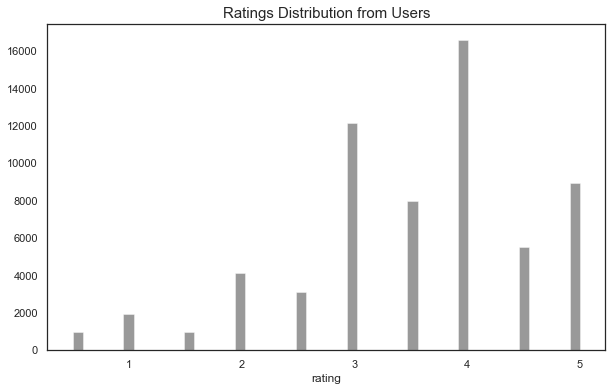

In [39]:
# Plotting Ratings distribution of observations using a dist-plot
plt.figure(figsize = (10,6))
axes=sns.distplot(df_movies['rating'],color='black',kde=False)
axes.set_title('Ratings Distribution from Users',fontsize=15)
plt.show()


In [34]:
#Create the dataframe "df"
df=extract_popular_movies(df_train,df_movies)

#Extracting latest movies from 2010 to date
latest_movies=df[df['release_year']>'2008'][['rating','ratings_count','title']]

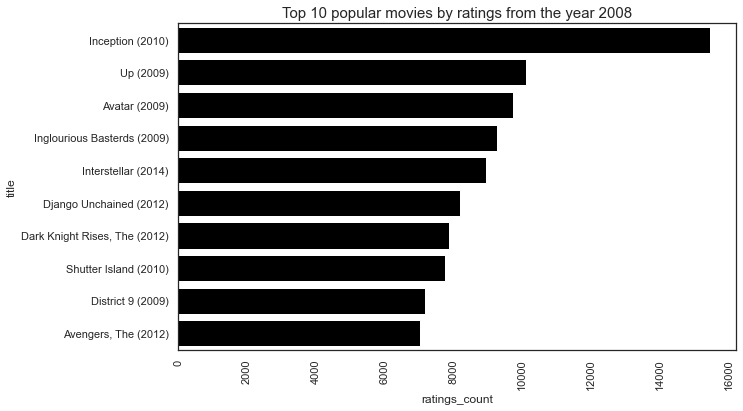

In [36]:
#Plotting the latest movies from 2010 to date using a bar-plot
plt.figure(figsize = (10,6))
axes=sns.barplot(y='title', x='ratings_count', data=latest_movies.head(10),color='black')
axes.set_title('Top 10 popular movies by ratings from the year 2008',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Title_cast Wordcloud

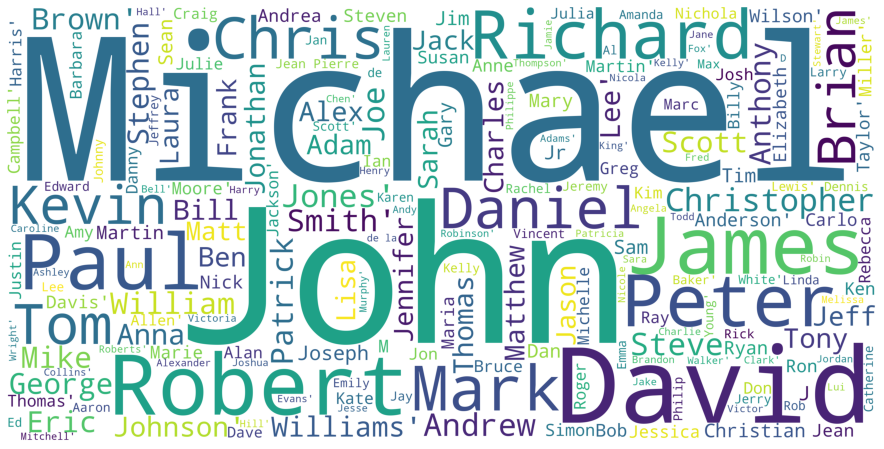

In [37]:
# Creating a wordcloud of the movie titles to view the most popular movie titles withtin the word cloud
df_imdb['title_cast'] = df_imdb['title_cast'].fillna("").astype('str')
title_corpus = ' '.join(df_imdb['title_cast'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)

# Plotting the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

We can see the names of the cast such as Michael, David, Paul, James, John, Peter, Richard and Robert just to name a few these names had a large fontsize because they appeared a lot on the in most movies from our dataset.